In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\b.Yuva Shree\Downloads\archive (13)\spam.csv', encoding='latin')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
columns_to_drop = ['Unnamed: 2']  # Specify the names of columns you want to drop
df = df.drop(columns=columns_to_drop)

In [7]:
df.head()

,v1,v2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN


In [8]:
columns_to_drop = ['Unnamed: 3']  # Specify the names of columns you want to drop
df = df.drop(columns=columns_to_drop)

In [9]:
columns_to_drop = ['Unnamed: 4']  # Specify the names of columns you want to drop
df = df.drop(columns=columns_to_drop)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

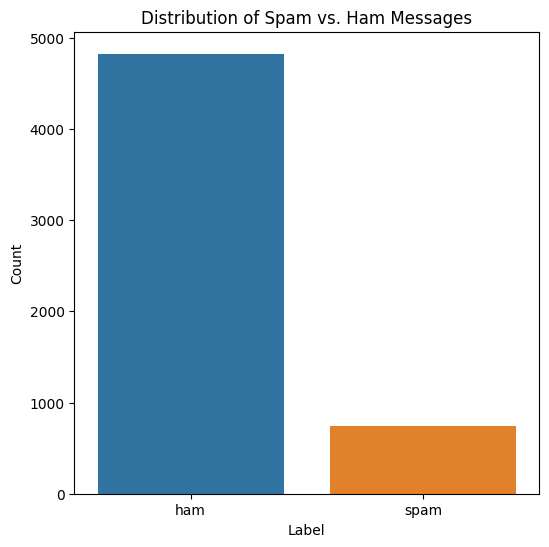

In [13]:
plt.figure(figsize=(6, 6))
sns.countplot(x='v1', data=df)
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [14]:
df['message_length'] = df['v2'].apply(len)

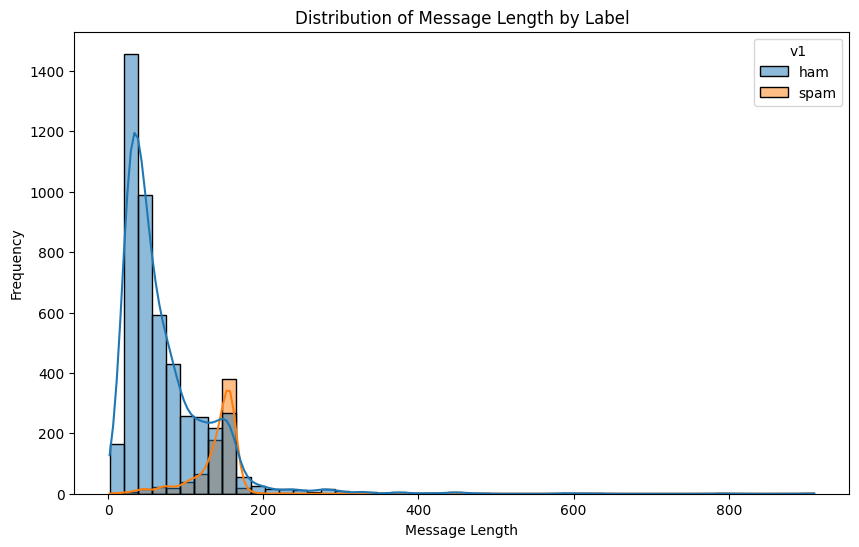

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='v1', bins=50, kde=True)
plt.title('Distribution of Message Length by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
import re

In [17]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\b.Yuva
[nltk_data]     Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\b.Yuva
[nltk_data]     Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
def remove_stopwords(text):
    s=[]
    for i in v2:
        tokens = word_tokenize(i)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        filtered_text = ' '.join(filtered_tokens)
        s.append(filtered_text)
    return s

In [19]:
v2=df['v2'].tolist()

In [20]:
v2

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had y

In [23]:
s=remove_stopwords(v2)
s

['Go jurong point , crazy .. Available bugis n great world la e buffet ... Cine got amore wat ...',
 'Ok lar ... Joking wif u oni ...',
 "Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 . Text FA 87121 receive entry question ( std txt rate ) & C 's apply 08452810075over18 's",
 'U dun say early hor ... U c already say ...',
 "Nah n't think goes usf , lives around though",
 "FreeMsg Hey darling 's 3 week 's word back ! 'd like fun still ? Tb ok ! XxX std chgs send , å£1.50 rcv",
 'Even brother like speak . treat like aids patent .',
 "per request 'Melle Melle ( Oru Minnaminunginte Nurungu Vettam ) ' set callertune Callers . Press * 9 copy friends Callertune",
 'WINNER ! ! valued network customer selected receivea å£900 prize reward ! claim call 09061701461 . Claim code KL341 . Valid 12 hours .',
 'mobile 11 months ? U R entitled Update latest colour mobiles camera Free ! Call Mobile Update Co FREE 08002986030',
 "'m gon na home soon n't want talk stuff anymore tonight , k ? '

In [28]:
corpus = []
ps = PorterStemmer()
for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.v2[i]) #Cleaning special character from the message
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [35]:
y = pd.get_dummies(df['v2'])
y = y.iloc[:, 1].values

In [37]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [53]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [54]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
print("Predictions vs Actual Labels:")
for pred, actual in zip(y_pred[:10], y_test[:10]):
    print("Predicted:", pred, "| Actual:", actual)

Predictions vs Actual Labels:
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0


In [57]:
acc_s = accuracy_score(y_test, y_pred)*100

In [58]:
print("Accuracy Score {} %".format(round(acc_s,2)))

Accuracy Score 100.0 %


In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
log_model=LogisticRegression(random_state=0,max_iter=2000)

In [62]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=0)

In [64]:
y_pred1 = log_model.predict(X_test)

In [65]:
print("Predictions vs Actual Labels:")
for pred, actual in zip(y_pred1[:10], y_test[:10]):
    print("Predicted:", pred, "| Actual:", actual)

Predictions vs Actual Labels:
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0


In [66]:
acc_s = accuracy_score(y_test, y_pred1)*100
print("Accuracy Score {} %".format(round(acc_s,2)))

Accuracy Score 100.0 %


In [68]:
from sklearn.svm import SVC

In [69]:
svm_classifier = SVC(kernel='linear')

In [70]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [71]:
y_pred2 = svm_classifier.predict(X_test)

In [72]:
print("Predictions vs Actual Labels:")
for pred, actual in zip(y_pred2[:10], y_test[:10]):
    print("Predicted:", pred, "| Actual:", actual)

Predictions vs Actual Labels:
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0


In [73]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
